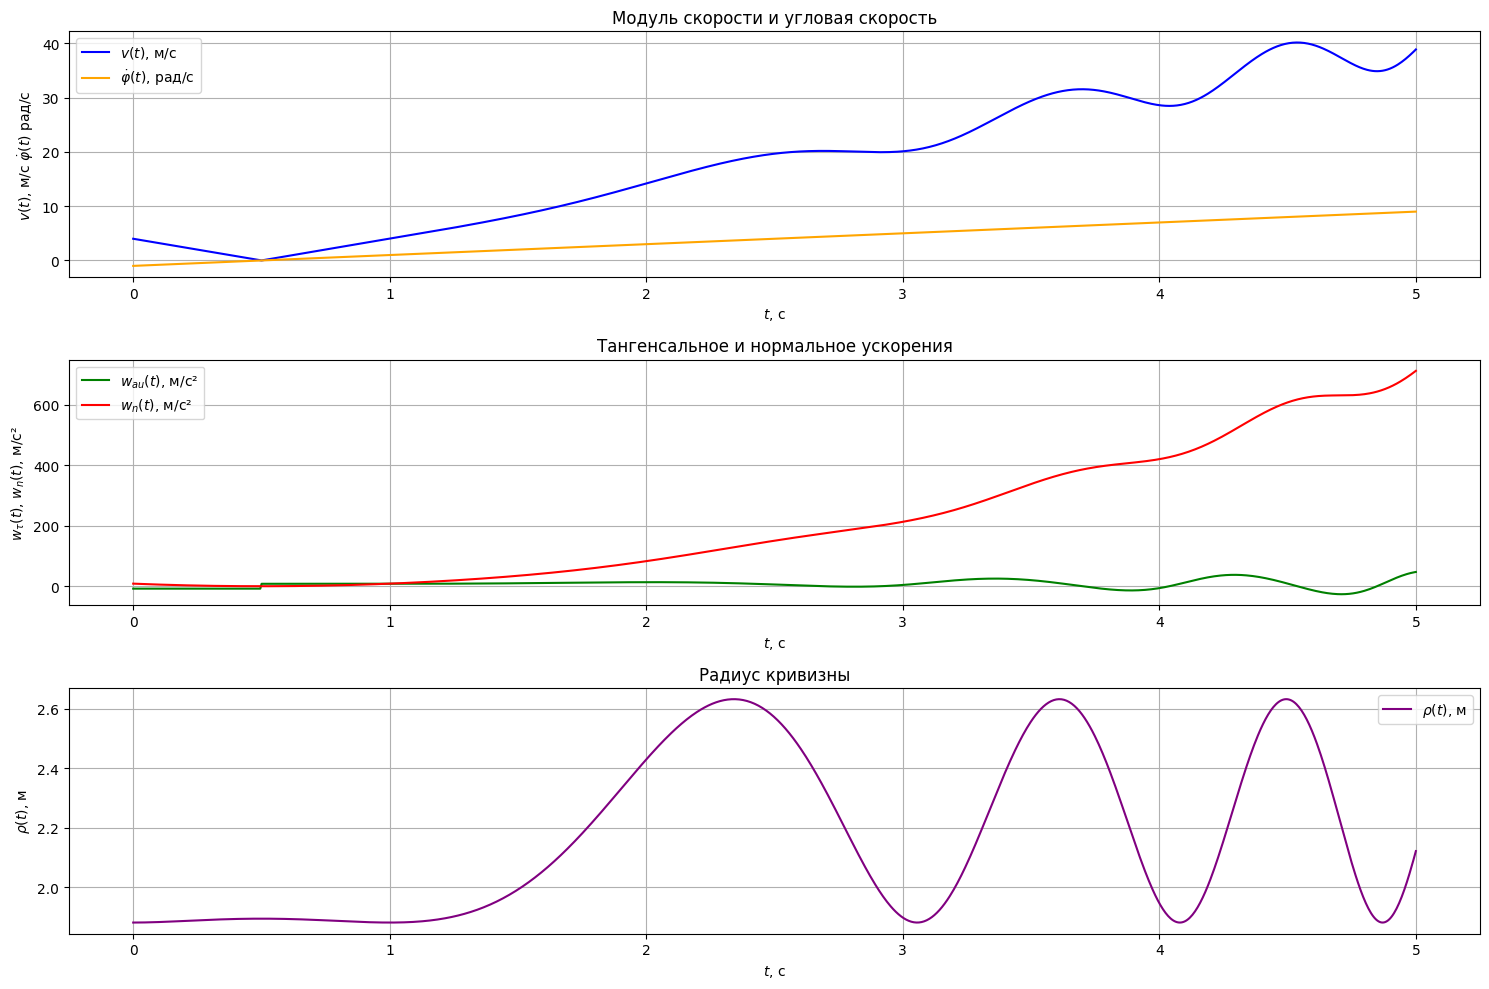

In [46]:
%matplotlib inline
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

R, k, omega, t_0 = 1, 1, 1, 1

t = sp.symbols('t')
phi = k*t**2 - omega*t
r = sp.Rational(R, 2)*(1 - 9*sp.cos(phi))

x = sp.expand(r * sp.cos(phi))
y = sp.expand(r * sp.sin(phi))

v_x = sp.simplify(sp.diff(x, t))
v_y = sp.simplify(sp.diff(y, t))
v = sp.simplify(sp.sqrt(v_x**2 + v_y**2))

dphi = sp.diff(phi, t)

w_tau = sp.diff(v, t)

w_x = sp.simplify(sp.diff(v_x, t))
w_y = sp.simplify(sp.diff(v_y, t))

w = sp.sqrt(w_x**2 + w_y**2)
w_n = sp.sqrt(w**2 - w_tau**2)

rho = v**2 / w_n
rho_t0 = rho.subs(t, t_0)

# Подготовка для численного вычисления
t_vals = np.linspace(0, 5, 1000)
v_func = sp.lambdify(t, v, 'numpy')
dphi_func = sp.lambdify(t, dphi, 'numpy')
w_tau_func = sp.lambdify(t, w_tau, 'numpy')
w_n_func = sp.lambdify(t, w_n, 'numpy')
rho_func = sp.lambdify(t, rho, 'numpy')

# Вычисление значений
v_vals = v_func(t_vals)
dphi_vals = dphi_func(t_vals)
w_tau_vals = w_tau_func(t_vals)
w_n_vals = w_n_func(t_vals)
rho_vals = rho_func(t_vals)

# Создание графиков
plt.figure(figsize=(15, 10))

# График v и dphi
plt.subplot(3, 1, 1)
plt.plot(t_vals, v_vals, label='$v(t)$, м/c', color='blue')
plt.plot(t_vals, dphi_vals, label=r'$\dot{\varphi}(t)$, рад/c', color='orange')
plt.title('Модуль скорости и угловая скорость')
plt.xlabel('$t$, с')
plt.ylabel(r'$v(t)$, м/с $\dot{\varphi}(t)$ рад/с')
plt.legend()
plt.grid()

# График w_tau и w_n
plt.subplot(3, 1, 2)
plt.plot(t_vals, w_tau_vals, label='$w_{\tau}(t)$, м/с²', color='green')
plt.plot(t_vals, w_n_vals, label='$w_n(t)$, м/с²', color='red')
plt.title('Тангенсальное и нормальное ускорения')
plt.xlabel('$t$, с')
plt.ylabel(r'$w_\tau(t)$, $w_n(t)$, м/с²')
plt.legend()
plt.grid()

# График rho
plt.subplot(3, 1, 3)
plt.plot(t_vals, rho_vals, label=r'$\rho(t)$, м', color='purple')
plt.title('Радиус кривизны')
plt.xlabel('$t$, с')
plt.ylabel(r'$\rho(t)$, м')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('figure.png', dpi=1024)


In [47]:
from IPython.display import display, Markdown

text = r'''
# Услвоие задачи
## Дано:
$$
r( \varphi ) = R \left( \sin ^2 \left( \frac{\varphi}{2} \right) - 4 \cos \varphi \right) = \frac{R}{2} \left( 1 - 9 \cos \varphi \right)
$$
$$
\varphi(t) = kt^2 - \omega t
$$
$$
R = 1 \ \text{м}, \quad k = 1 \ \frac{\text{рад}}{\text{c}^2}, \quad \omega = 1 \ \frac{\text{рад}}{\text{c}}, \quad t_0 = 1 \ \text{с}
$$

## Найти:
1. Скорости
$$
v(t), \ \dot{\varphi}(t)
$$

2. Ускорения
$$
w_\tau(t), \ w_n(t)
$$

3. Радиус кривизны
$$
\rho(t), \ \rho(t_0)
$$

4. Выполнить проверку
$$
\rho(t) \ \rightarrow \ \rho(t_0)
$$
'''

with open('text.txt', 'w', encoding='utf-8') as file:
    file.write(text + '\n')
display(Markdown(text))


# Услвоие задачи
## Дано:
$$
r( \varphi ) = R \left( \sin ^2 \left( \frac{\varphi}{2} \right) - 4 \cos \varphi \right) = \frac{R}{2} \left( 1 - 9 \cos \varphi \right)
$$
$$
\varphi(t) = kt^2 - \omega t
$$
$$
R = 1 \ \text{м}, \quad k = 1 \ \frac{\text{рад}}{\text{c}^2}, \quad \omega = 1 \ \frac{\text{рад}}{\text{c}}, \quad t_0 = 1 \ \text{с}
$$

## Найти:
1. Скорости
$$
v(t), \ \dot{\varphi}(t)
$$

2. Ускорения
$$
w_\tau(t), \ w_n(t)
$$

3. Радиус кривизны
$$
\rho(t), \ \rho(t_0)
$$

4. Выполнить проверку
$$
\rho(t) \ \rightarrow \ \rho(t_0)
$$


In [48]:
text = r'''
# 1. Скорости
$$
x = r \cos(\varphi) = ''' + f'{sp.latex(x)}' + r'''
$$

$$
y = r \sin(\varphi) = ''' + f'{sp.latex(y)}' + r'''
$$

$$
v_x = \dot{x} = ''' + f'{sp.latex(v_x)}' + r'''
$$

$$
v_y = \dot{y} = ''' + f'{sp.latex(v_y)}' + r'''
$$

$$
v = \sqrt{v_x^2 + v_y^2}, \quad \dot{\varphi} = \frac{d \varphi}{dt}
$$

$$
v(t) = ''' + f'{sp.latex(v)}' + r'''
$$

$$
\dot{\varphi}(t) = ''' + f'{sp.latex(dphi)}' + r'''
$$'''

with open('text.txt', 'a', encoding='utf-8') as file:
    file.write(text + '\n')
display(Markdown(text))


# 1. Скорости
$$
x = r \cos(\varphi) = - \frac{9 \cos^{2}{\left(t^{2} - t \right)}}{2} + \frac{\cos{\left(t^{2} - t \right)}}{2}
$$

$$
y = r \sin(\varphi) = - \frac{9 \sin{\left(t^{2} - t \right)} \cos{\left(t^{2} - t \right)}}{2} + \frac{\sin{\left(t^{2} - t \right)}}{2}
$$

$$
v_x = \dot{x} = \left(t - \frac{1}{2}\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin{\left(t \left(t - 1\right) \right)}
$$

$$
v_y = \dot{y} = \frac{\left(9 - 18 t\right) \cos^{2}{\left(t \left(t - 1\right) \right)}}{2} + \frac{\left(2 t - 1\right) \cos{\left(t \left(t - 1\right) \right)}}{2} + \frac{\left(18 t - 9\right) \sin^{2}{\left(t \left(t - 1\right) \right)}}{2}
$$

$$
v = \sqrt{v_x^2 + v_y^2}, \quad \dot{\varphi} = \frac{d \varphi}{dt}
$$

$$
v(t) = \frac{\sqrt{\left(2 t - 1\right)^{2} \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}}{2}
$$

$$
\dot{\varphi}(t) = 2 t - 1
$$

In [49]:
text = r'''
# 2. Ускорения
$$
w_x = \dot{v_x} = ''' + sp.latex(w_x) + r'''
$$

$$
w_y = \dot{v_y} = ''' + sp.latex(w_y) + r'''
$$

$$
w = \sqrt{w_x^2 + w_y^2} = ''' + sp.latex(w) + r'''
$$

$$
w_\tau = \frac{dv}{dt} = ''' + sp.latex(w_tau) + r'''
$$

$$
w_n = \sqrt{w^2 - w_\tau^2} =  ''' + sp.latex(w_n) + r'''
$$'''

with open('text.txt', 'a', encoding='utf-8') as file:
    file.write(text + '\n')
display(Markdown(text))


# 2. Ускорения
$$
w_x = \dot{v_x} = \frac{\left(2 t - 1\right)^{2} \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \cos{\left(t \left(t - 1\right) \right)}}{2} - 9 \left(2 t - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin{\left(t \left(t - 1\right) \right)}
$$

$$
w_y = \dot{v_y} = - \frac{\left(2 t - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)}}{2} + 9 \left(2 t - 1\right)^{2} \sin{\left(2 t \left(t - 1\right) \right)} + 9 \sin^{2}{\left(t \left(t - 1\right) \right)} - 9 \cos^{2}{\left(t \left(t - 1\right) \right)} + \cos{\left(t \left(t - 1\right) \right)}
$$

$$
w = \sqrt{w_x^2 + w_y^2} = \sqrt{\left(\frac{\left(2 t - 1\right)^{2} \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \cos{\left(t \left(t - 1\right) \right)}}{2} - 9 \left(2 t - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin{\left(t \left(t - 1\right) \right)}\right)^{2} + \left(- \frac{\left(2 t - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)}}{2} + 9 \left(2 t - 1\right)^{2} \sin{\left(2 t \left(t - 1\right) \right)} + 9 \sin^{2}{\left(t \left(t - 1\right) \right)} - 9 \cos^{2}{\left(t \left(t - 1\right) \right)} + \cos{\left(t \left(t - 1\right) \right)}\right)^{2}}
$$

$$
w_\tau = \frac{dv}{dt} = \frac{\sqrt{\left(2 t - 1\right)^{2} \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)} \left(\frac{\left(2 t - 1\right)^{2} \left(2 \left(2 t - 1\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)} \cos{\left(t \left(t - 1\right) \right)} - 36 \left(2 t - 1\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin^{3}{\left(t \left(t - 1\right) \right)} + \left(- 2 \left(2 t - 1\right) \sin{\left(t \left(t - 1\right) \right)} + 18 \left(4 t - 2\right) \sin{\left(2 t \left(t - 1\right) \right)}\right) \left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)\right)}{2} + \frac{\left(8 t - 4\right) \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}{2}\right)}{2 \left(2 t - 1\right)^{2} \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}
$$

$$
w_n = \sqrt{w^2 - w_\tau^2} =  \sqrt{\left(\frac{\left(2 t - 1\right)^{2} \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \cos{\left(t \left(t - 1\right) \right)}}{2} - 9 \left(2 t - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin{\left(t \left(t - 1\right) \right)}\right)^{2} + \left(- \frac{\left(2 t - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)}}{2} + 9 \left(2 t - 1\right)^{2} \sin{\left(2 t \left(t - 1\right) \right)} + 9 \sin^{2}{\left(t \left(t - 1\right) \right)} - 9 \cos^{2}{\left(t \left(t - 1\right) \right)} + \cos{\left(t \left(t - 1\right) \right)}\right)^{2} - \frac{\left(\frac{\left(2 t - 1\right)^{2} \left(2 \left(2 t - 1\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)} \cos{\left(t \left(t - 1\right) \right)} - 36 \left(2 t - 1\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin^{3}{\left(t \left(t - 1\right) \right)} + \left(- 2 \left(2 t - 1\right) \sin{\left(t \left(t - 1\right) \right)} + 18 \left(4 t - 2\right) \sin{\left(2 t \left(t - 1\right) \right)}\right) \left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)\right)}{2} + \frac{\left(8 t - 4\right) \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}{2}\right)^{2}}{4 \left(2 t - 1\right)^{2} \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}}
$$

In [50]:
text = r'''
# 3. Радиус кривизны
$$
w_n = \frac{v^2}{\rho} \ \Rightarrow \ \rho = \frac{v^2}{w_n}
$$

$$
\rho = ''' + sp.latex(rho) + r'''
$$

$$
\rho (t_0) = ''' + sp.latex(rho_t0) + r'''
$$'''

with open('text.txt', 'a', encoding='utf-8') as file:
    file.write(text + '\n')
display(Markdown(text))


# 3. Радиус кривизны
$$
w_n = \frac{v^2}{\rho} \ \Rightarrow \ \rho = \frac{v^2}{w_n}
$$

$$
\rho = \frac{\left(2 t - 1\right)^{2} \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}{4 \sqrt{\left(\frac{\left(2 t - 1\right)^{2} \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \cos{\left(t \left(t - 1\right) \right)}}{2} - 9 \left(2 t - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin{\left(t \left(t - 1\right) \right)}\right)^{2} + \left(- \frac{\left(2 t - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)}}{2} + 9 \left(2 t - 1\right)^{2} \sin{\left(2 t \left(t - 1\right) \right)} + 9 \sin^{2}{\left(t \left(t - 1\right) \right)} - 9 \cos^{2}{\left(t \left(t - 1\right) \right)} + \cos{\left(t \left(t - 1\right) \right)}\right)^{2} - \frac{\left(\frac{\left(2 t - 1\right)^{2} \left(2 \left(2 t - 1\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin{\left(t \left(t - 1\right) \right)} \cos{\left(t \left(t - 1\right) \right)} - 36 \left(2 t - 1\right) \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right) \sin^{3}{\left(t \left(t - 1\right) \right)} + \left(- 2 \left(2 t - 1\right) \sin{\left(t \left(t - 1\right) \right)} + 18 \left(4 t - 2\right) \sin{\left(2 t \left(t - 1\right) \right)}\right) \left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)\right)}{2} + \frac{\left(8 t - 4\right) \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}{2}\right)^{2}}{4 \left(2 t - 1\right)^{2} \left(\left(\cos{\left(t \left(t - 1\right) \right)} - 9 \cos{\left(2 t \left(t - 1\right) \right)}\right)^{2} + \left(18 \cos{\left(t \left(t - 1\right) \right)} - 1\right)^{2} \sin^{2}{\left(t \left(t - 1\right) \right)}\right)}}}
$$

$$
\rho (t_0) = \frac{32}{17}
$$

In [51]:
phi = sp.symbols(r'\varphi')

r = sp.Rational(R, 2)*(1 - 9*sp.cos(phi))

dr = sp.diff(r, phi)
ddr = sp.diff(dr, phi)

rho = sp.simplify((r**2 + dr**2)**(sp.Rational(3, 2))/abs(r**2 + 2*dr**2-r*ddr))
rho_t0 = rho.subs(phi, 0)
print(rho_t0)

rho_t = sp.simplify(rho.subs(phi, k*t**2 - omega*t))

text = r'''
# 4. Проверка радиуса кривизны
Рассчитаем радиус кривизны другим способом:

$$
\rho(\varphi) = \frac{ \left( r^2 + r'_\varphi \right)^{\frac{3}{2}} }{ \left| r^2 + 2{(r'_\varphi)}^2 - r r''_\varphi \right| }
$$

$$
r'_\varphi = ''' + sp.latex(dr) + r'''
$$

$$
r''_\varphi = ''' + sp.latex(ddr) + r'''
$$

$$
\rho(\varphi) = ''' + sp.latex(rho) + r'''
$$

$$
\rho(t) = ''' + sp.latex(rho_t) + r'''
$$

$$
\rho(t_0) = ''' + sp.latex(rho_t.subs(t, t_0)) + r'''
$$

Проверка верна!

'''

with open('text.txt', 'a', encoding='utf-8') as file:
    file.write(text + '\n')
display(Markdown(text))

32/17



# 4. Проверка радиуса кривизны
Рассчитаем радиус кривизны другим способом:

$$
\rho(\varphi) = \frac{ \left( r^2 + r'_\varphi \right)^{\frac{3}{2}} }{ \left| r^2 + 2{(r'_\varphi)}^2 - r r''_\varphi \right| }
$$

$$
r'_\varphi = \frac{9 \sin{\left(\varphi \right)}}{2}
$$

$$
r''_\varphi = \frac{9 \cos{\left(\varphi \right)}}{2}
$$

$$
\rho(\varphi) = \frac{\left(82 - 18 \cos{\left(\varphi \right)}\right)^{\frac{3}{2}}}{2 \left|{27 \cos{\left(\varphi \right)} - 163}\right|}
$$

$$
\rho(t) = \frac{\sqrt{2} \left(41 - 9 \cos{\left(t \left(t - 1\right) \right)}\right)^{\frac{3}{2}}}{\left|{27 \cos{\left(t \left(t - 1\right) \right)} - 163}\right|}
$$

$$
\rho(t_0) = \frac{32}{17}
$$

Проверка верна!

